In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [10]:
df = pd.read_csv("C:/Users/KIIT/Documents/PersonalityDetection/UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [11]:
# Count categories and reset index
category = df['Category'].value_counts().reset_index()
category.columns = ['Category', 'Count']  # Rename columns
category.head()

,Category,Count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45


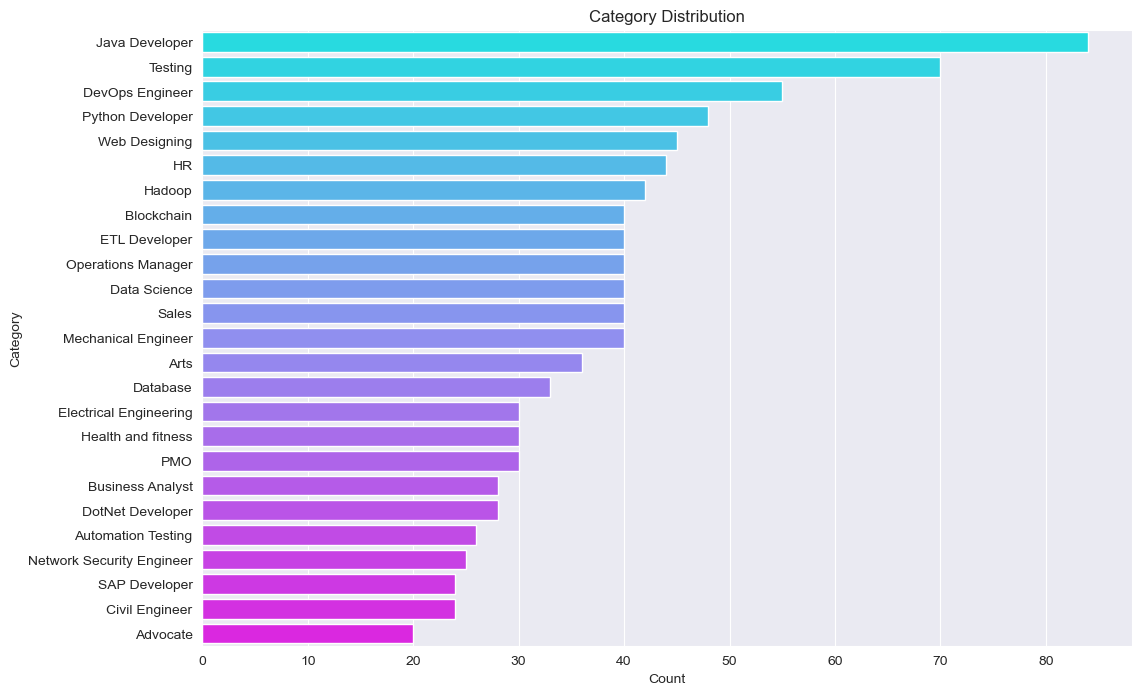

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x='Count', y='Category', data=category, palette='cool')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution')
plt.show()


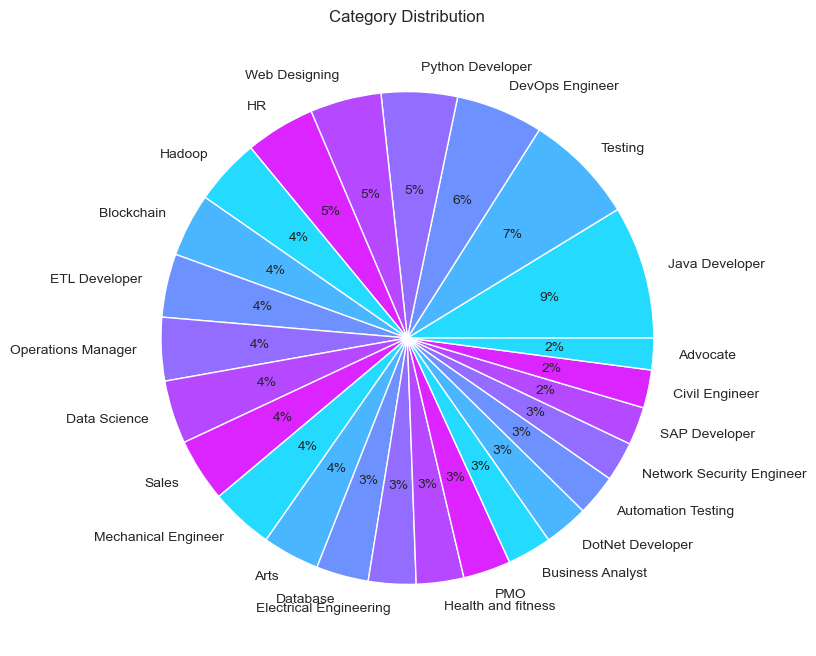

In [13]:
plt.figure(figsize=(12,8))
plt.pie(category['Count'], labels=category['Category'], 
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [14]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # Remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # Remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # Remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # Remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # Remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)  # Remove non-ASCII characters
    resumeText = re.sub('\s+', ' ', resumeText)  # Remove extra whitespaces
    return resumeText

df['cleaned'] = df['Resume'].apply(lambda x: cleanResume(x))
df[['Resume', 'cleaned']].head()

,Resume,cleaned
0,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [15]:
corpus = ' '.join(df['cleaned'].tolist())
print(f"Length of the corpus: {len(corpus)}")

Length of the corpus: 2804342


In [16]:
# Run this cell to install the WordCloud library if not already installed
!pip install wordcloud

In [17]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')

# Tokenize corpus and convert to lowercase
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(corpus)
words = [word.lower() for word in tokens]
print(words[:5])

['skills', 'programming', 'languages', 'python', 'pandas']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df[['Category', 'new_Category']].head()

,Category,new_Category
0,Data Science,6
1,Data Science,6
2,Data Science,6
3,Data Science,6
4,Data Science,6


In [25]:
text = df['cleaned'].values
target = df['new_Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)
WordFeatures.shape

(962, 1500)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((769, 1500), (193, 1500), (769,), (193,))

In [27]:
# Prediction
y_pred = model.predict(X_test)

# Evaluate the model
training_accuracy = model.score(X_train, y_train) * 100
validation_accuracy = model.score(X_test, y_test) * 100

print(f"Training Accuracy: {round(training_accuracy, 2)}%")
print(f"Validation Accuracy: {round(validation_accuracy, 2)}%")

Training Accuracy: 98.96%
Validation Accuracy: 96.89%


In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      0.57      0.73         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

['skill', 'programming', 'language', 'python', 'panda']


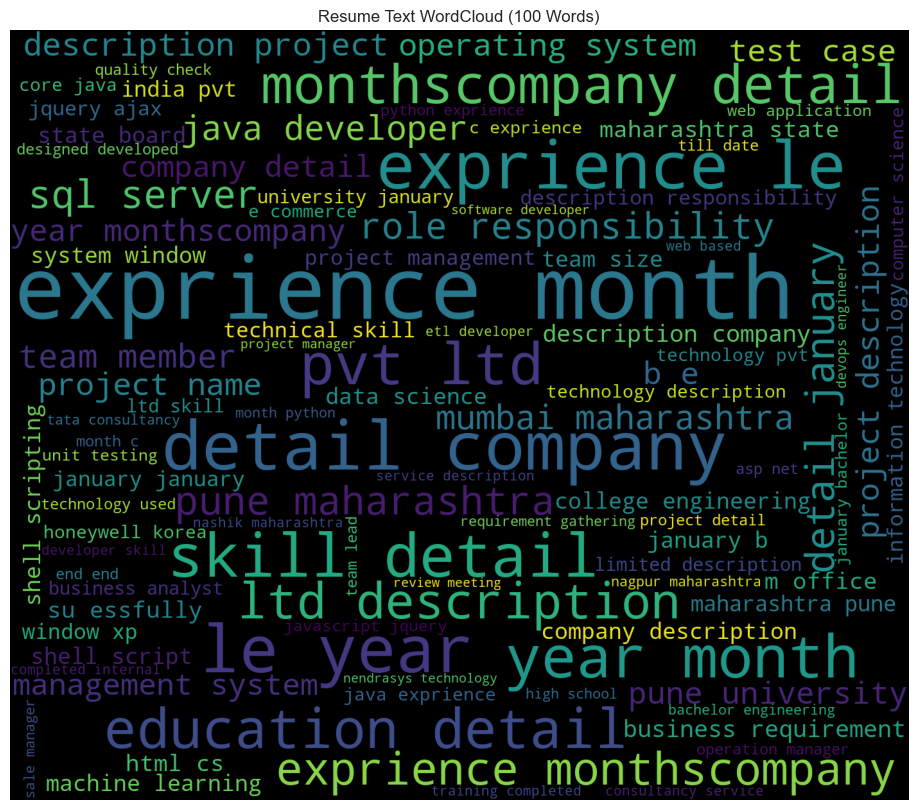

In [29]:
# Remove stopwords from words
stopwords_list = set(stopwords.words('english'))
words_new = [word for word in words if word not in stopwords_list]

# Lemmatize the words
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

lem_words = [wn.lemmatize(word) for word in words_new]
print(lem_words[:5])

# Generate wordcloud
res = ' '.join([i for i in lem_words if not i.isdigit()])
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(background_color='black', max_words=100, width=1400, height=1200).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()